<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 5: Practical - Lasso & Ridge Regression <br> <br>
<font color=686880 size=4>
    TAs: Alireza Dehghanpour - Arman Malekzadeh - Ali Salesi
    
____

### Full Name : Mehdi Lotfian
### Student Number : 99105689
### Colab Link: https://colab.research.google.com/drive/1ehxjkTWBmeE5zxsuYrugpD3fgKzpHPFG?usp=sharing
___

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.

In this assignment you have to predict **life expectancy**.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Data Exploration (20 points)

In [2]:
!wget -O /content/dataset.csv "https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1"

--2023-05-13 19:19:14--  https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2kz21qjt40pjy43/train.csv [following]
--2023-05-13 19:19:14--  https://www.dropbox.com/s/dl/2kz21qjt40pjy43/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0c7a6fca4b408bb04bb37f32a0.dl.dropboxusercontent.com/cd/0/get/B7_rGIoG6nD5fc5644yZoXvfWTBx2N7Eqm-KFNSFSMDj7vS8YIYuDt3ZOhSsMCA14FrcKxkDvATsPZIWbE99GinOrAGI63l8xQQ957fCC_wViNrgXdd2nb2_Md63w2RrYNFb-Vo-7yXTfKNBvnITCn4hUSWMd_YgZb-5MQQpWI8gY9IRj0-5xl1emWbnpaI7pi8/file?dl=1# [following]
--2023-05-13 19:19:14--  https://uc0c7a6fca4b408bb04bb37f32a0.dl.dropboxusercontent.com/cd/0/get/B7_rGIoG6nD5fc5644yZoXvfWTBx2N7Eqm-KFNSFSMDj7vS8YIYuDt3ZOhSsMCA14F

Load the dataset as a dataframe

In [3]:
df = pd.read_csv("dataset.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Finland,2013,Developing,87.0,79.0,0,8.97,6115.496624,NaN,2,...,98.0,9.55,98.0,0.1,49638.771300,5438972.0,0.9,0.8,0.887,17.0
1,Japan,2015,Developed,83.7,55.0,2,NaN,0.000000,NaN,35,...,99.0,NaN,96.0,0.1,34474.137360,127141.0,2.1,1.8,0.902,15.3
2,Syrian Arab Republic,2014,Developing,64.4,294.0,7,0.01,0.000000,47.0,594,...,52.0,3.25,43.0,0.1,NaN,19239.0,6.3,6.1,0.575,9.0
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,Tunisia,2000,Developing,72.9,112.0,4,1.21,264.784220,94.0,47,...,97.0,5.40,97.0,0.1,2213.914880,9699197.0,6.6,6.5,0.646,12.8
2493,Myanmar,2001,Developing,62.5,239.0,72,0.38,1.917164,NaN,2519,...,77.0,1.80,73.0,0.4,138.924927,46627994.0,13.3,13.7,0.427,7.6
2494,Netherlands,2008,Developed,83.0,68.0,1,9.62,10873.405540,NaN,109,...,97.0,9.57,97.0,0.1,56928.824800,16445593.0,1.0,0.9,0.905,16.8
2495,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9


Plot "year" against "average life expectancy"

<ipython-input-4-77badef04064>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Year']).mean()['Life expectancy '].plot()


<Axes: xlabel='Year'>

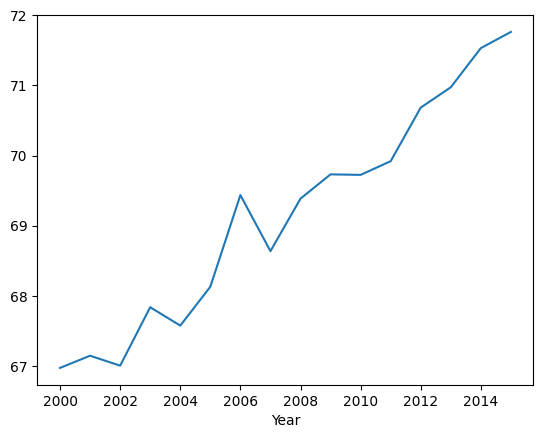

In [4]:
df.groupby(['Year']).mean()['Life expectancy '].plot()

Compare the average life expectancy of "Developed" and "Developing" countries for each year 

In [5]:
life_expectancy_status_year = df.groupby(['Year', 'Status']).mean()['Life expectancy ']
life_expectancy_status_year

<ipython-input-5-f2568a66bfe6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  life_expectancy_status_year = df.groupby(['Year', 'Status']).mean()['Life expectancy ']


Year  Status    
2000  Developed     76.891667
      Developing    65.004959
2001  Developed     77.114286
      Developing    65.048120
2002  Developed     77.710000
      Developing    64.393496
2003  Developed     78.257692
      Developing    65.617213
2004  Developed     78.452000
      Developing    65.500000
2005  Developed     78.792593
      Developing    65.898450
2006  Developed     79.346667
      Developing    67.167939
2007  Developed     79.252381
      Developing    66.935878
2008  Developed     78.796552
      Developing    67.365185
2009  Developed     79.581481
      Developing    67.777206
2010  Developed     80.167857
      Developing    67.404762
2011  Developed     79.821739
      Developing    68.182443
2012  Developed     80.512000
      Developing    68.823485
2013  Developed     80.376923
      Developing    69.049606
2014  Developed     81.292593
      Developing    69.442063
2015  Developed     80.175000
      Developing    69.937984
Name: Life expectancy ,

<Axes: xlabel='Year'>

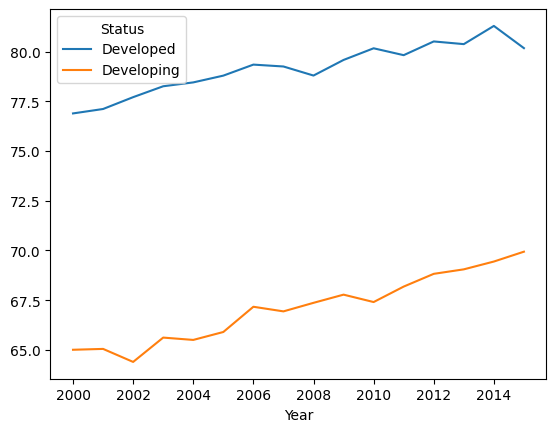

In [6]:
life_expectancy_status_year.unstack().plot()

Get the correlation between "Life expectancy" and "GDP"

In [7]:
print(df['Life expectancy '].corr(df['GDP']))

0.4652553879500644


Find out the feature having the strongest correlation with the "Life expectancy"<br>
Note: Do not display all of the correlation values. Your code should only print the result (the name of a column).

In [8]:
corr = df.corr()['Life expectancy ']
strongest_feature = corr[corr.index != 'Life expectancy '].abs().idxmax()
strongest_feature

<ipython-input-8-35406d324025>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['Life expectancy ']


'Schooling'

# Preprocessing (20 points)

Remove the rows containing NaN (or null) values

In [9]:
df_nn = df.dropna()
df_nn

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
7,Colombia,2005,Developing,73.1,144.0,15,4.38,531.980818,93.0,0,...,93.0,5.82,93.0,0.1,3386.256000,43285634.0,2.4,2.1,0.658,11.1
11,Botswana,2012,Developing,63.4,3.0,2,0.01,12.834474,95.0,7,...,96.0,6.27,95.0,4.4,729.231453,289315.0,7.3,7.0,0.687,12.5
12,Mexico,2014,Developing,76.6,122.0,31,5.26,168.173753,84.0,3,...,87.0,6.30,87.0,0.1,1452.277660,1242216.0,1.6,1.5,0.754,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,Mauritius,2009,Developing,72.8,166.0,0,2.83,624.236183,99.0,15,...,99.0,4.97,99.0,0.1,7318.126410,1247429.0,7.3,7.3,0.734,13.8
2485,Mali,2009,Developing,56.0,276.0,55,0.59,84.634389,71.0,2939,...,77.0,6.85,73.0,1.6,697.153124,1466597.0,9.0,8.8,0.385,7.1
2488,Turkmenistan,2008,Developing,64.5,235.0,6,2.40,34.239794,96.0,0,...,96.0,1.93,96.0,0.1,394.467675,4935762.0,3.2,3.3,0.000,10.5
2490,Angola,2007,Developing,48.2,375.0,87,6.35,184.821345,73.0,1014,...,75.0,3.38,73.0,2.6,2878.837144,2997687.0,9.6,9.6,0.454,7.7


Convert categorical columns into their one-hot encoded versions

In [10]:
df_encoded = pd.get_dummies(df_nn)
df_encoded

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
3,2010,72.8,18.0,0,9.80,1109.969508,91.0,0,58.9,0,...,0,0,0,0,0,0,0,0,1,0
4,2013,67.1,192.0,0,0.01,200.660099,97.0,0,29.3,0,...,0,0,0,0,0,0,0,0,0,1
7,2005,73.1,144.0,15,4.38,531.980818,93.0,0,5.5,18,...,0,0,0,0,0,0,0,0,0,1
11,2012,63.4,3.0,2,0.01,12.834474,95.0,7,36.2,3,...,0,0,0,0,0,0,0,0,0,1
12,2014,76.6,122.0,31,5.26,168.173753,84.0,3,62.8,36,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,2009,72.8,166.0,0,2.83,624.236183,99.0,15,3.2,0,...,0,0,0,0,0,0,0,0,0,1
2485,2009,56.0,276.0,55,0.59,84.634389,71.0,2939,2.2,93,...,0,0,0,0,0,0,0,0,0,1
2488,2008,64.5,235.0,6,2.40,34.239794,96.0,0,42.7,8,...,1,0,0,0,0,0,0,0,0,1
2490,2007,48.2,375.0,87,6.35,184.821345,73.0,1014,18.8,138,...,0,0,0,0,0,0,0,0,0,1


Convert the dataframe into two numpy arrays (called `x` and `y`).<br>
To make the first array, remove the "Life expectancy" column, and convert the remaining dataframe to a numpy array.<br>
Then, use the removed column to make another numpy array (`y`).

In [11]:
x = df_encoded.drop('Life expectancy ', axis=1).to_numpy()
x

array([[2.010e+03, 1.800e+01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.013e+03, 1.920e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.005e+03, 1.440e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [2.008e+03, 2.350e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.007e+03, 3.750e+02, 8.700e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+03, 1.120e+02, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [12]:
y = df_encoded['Life expectancy '].to_numpy()
y

array([72.8, 67.1, 73.1, ..., 64.5, 48.2, 72.9])

Normalize the data

In [13]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[ 0.52684427, -1.20551632, -0.27267108, ..., -0.08851417,
         2.49387004, -2.49387004],
       [ 1.26862003,  0.19437979, -0.27267108, ..., -0.08851417,
        -0.40098321,  0.40098321],
       [-0.70944867, -0.19179845, -0.15310568, ..., -0.08851417,
        -0.40098321,  0.40098321],
       ...,
       [ 0.03232709,  0.54033113, -0.22484492, ..., -0.08851417,
        -0.40098321,  0.40098321],
       [-0.21493149,  1.66668432,  0.42080824, ..., -0.08851417,
        -0.40098321,  0.40098321],
       [-1.94574161, -0.44925061, -0.24078697, ..., -0.08851417,
        -0.40098321,  0.40098321]])

# Model Training

Split the data to training (80%) and testing (20%) parts (5 points)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=1)

# Common Regression Class

This is a regression class and you do not need to change its code. You have to fully understand it and then create new classes for rigde and lasso regression which inherit from this class.
For initialization you have to specify learning rate, number of iteration, and a regularization object.

In [15]:
class Regression:
    def __init__(self, learning_rate, iteration, regularization):
        
        self.N = None # number of samples
        self.n = None # number of features
        self.w = None # initial weights
        self.regularization = regularization # will be the l1/l2 regularization class according to the regression model
        self.lr = learning_rate
        self.it = iteration

    def loss_function(self, y, y_pred):
        return (1 / (2*self.N)) * np.sum(np.square(y_pred - y)) + self.regularization(self.w)
    
    def hypothesis(self, weights, X):
        return np.dot(X, weights)

    def train(self, X, y):
        # Target value should be in the shape of (n, 1) not (n, ).

        # Insert constant ones for bias weights.
        X = np.insert(X, 0, 1, axis=1)

        self.N = X.shape[0]
        self.n = X.shape[1]
        self.w = np.zeros((self.n , 1))

        for it in range(1, self.it+1):
            y_pred = self.hypothesis(self.w, X)
            cost = self.loss_function(y, y_pred)
            dw = (1/self.N) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
            self.w = self.w - self.lr * dw

            if it % 10 == 0:
                print("The loss function for the iteration {}----->{} :)".format(it, cost))
    
    def predict(self, test_X):
        # Insert constant ones for bias weights.
        test_X = np.insert(test_X, 0, 1, axis=1)
        y_pred = self.hypothesis(self.w, test_X)
        return y_pred

# Regularization Classes (20 points)

You have to implement l2/l1 regularization.

In [16]:
class l1_regularization:
    """Regularization used for Lasso Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be returned when we call this class."
        ## TO DO
        return self.lamda * np.linalg.norm(weights, ord=1)
        
    
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        ## TO DO
        return self.lamda * np.sign(weights)


class l2_regularization:
    """Regularization used for Ridge Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be retuned when we call this class."
        ## TO DO
        return self.lamda * np.linalg.norm(weights, ord=2)
    
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        ## TO DO
        return self.lamda * 2 * weights

# Lasso Regression from scratch (5 points)

Train a lasso regression model using your own code and the following class.

In [17]:
class LassoRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l1_regularization(lamda)
        super(LassoRegression, self).__init__(learning_rate, iteration, self.regularization)

In [18]:
y_train_reshaped = np.reshape(y_train, (-1, 1))

In [19]:
lr_model_scratch = LassoRegression(0.1, 0.1, 100)
lr_model_scratch.train(x_train, y_train_reshaped)

The loss function for the iteration 10----->370.8314322304017 :)
The loss function for the iteration 20----->61.72419842609418 :)
The loss function for the iteration 30----->20.33570228530465 :)
The loss function for the iteration 40----->13.97658759722157 :)
The loss function for the iteration 50----->12.878870302373329 :)
The loss function for the iteration 60----->12.645401416948932 :)
The loss function for the iteration 70----->12.580812266418913 :)
The loss function for the iteration 80----->12.550578347197838 :)
The loss function for the iteration 90----->12.525984292330785 :)
The loss function for the iteration 100----->12.509291864145165 :)


# Lasso Regression using skicit-learn (5 points)

Use `sklearn` to train a Lasso Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [20]:
lr_model_sklearn = Lasso()
lr_model_sklearn.fit(x_train, y_train)

Lasso()

In [33]:
param_grid = {'alpha': np.logspace(-4, 1, 6)}
grid_laso = GridSearchCV(Lasso(), param_grid, cv=10)
grid_laso.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.135e+03, tolerance: 7.765e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+03, tolerance: 7.831e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+03, tolerance: 7.791e

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])})

# Ridge Regression From scratch (5 points)

Train a ridge regression model using your own code and the following class.

In [21]:
class RidgeRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l2_regularization(lamda)
        super(RidgeRegression, self).__init__(learning_rate, iteration, self.regularization)

In [22]:
rr_model_scratch = RidgeRegression(0.001, 0.01, 500)
rr_model_scratch.train(x_train, y_train_reshaped)

The loss function for the iteration 10----->2005.927444951402 :)
The loss function for the iteration 20----->1630.2430198948023 :)
The loss function for the iteration 30----->1328.2041572889157 :)
The loss function for the iteration 40----->1083.9149478904367 :)
The loss function for the iteration 50----->885.804795202087 :)
The loss function for the iteration 60----->724.8745234289274 :)
The loss function for the iteration 70----->593.9701482305692 :)
The loss function for the iteration 80----->487.35929951867234 :)
The loss function for the iteration 90----->400.432108401373 :)
The loss function for the iteration 100----->329.47335639419316 :)
The loss function for the iteration 110----->271.4840297370371 :)
The loss function for the iteration 120----->224.03998749550163 :)
The loss function for the iteration 130----->185.17940159274642 :)
The loss function for the iteration 140----->153.3128095508371 :)
The loss function for the iteration 150----->127.15106618853514 :)
The loss func

# Ridge Regression using scikit-learn (5 points)

Use `sklearn` to train a Ridge Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [23]:
rr_model_sklearn = Ridge()
rr_model_sklearn.fit(x_train, y_train)

Ridge()

In [34]:
param_grid = {'alpha': np.logspace(-4, 1, 6)}
grid_ridge = GridSearchCV(Ridge(), param_grid, cv=10)
grid_ridge.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])})

# Evaluation (15 points)

For each model (the 2 models trained using `sklearn` and the ones based on your code), predict the output for the testing samples.

In [24]:
y_pred_lr_scratch = lr_model_scratch.predict(x_test)
y_pred_lr_sklearn = lr_model_sklearn.predict(x_test)
y_pred_rr_scratch = rr_model_scratch.predict(x_test)
y_pred_rr_sklearn = rr_model_sklearn.predict(x_test)

In [35]:
y_pred_lr_gs = grid_laso.predict(x_test)
y_pred_rr_gs = grid_ridge.predict(x_test)

Measure the performance of the models based on "mean squared error" and the "coefficient of determination" of the prediction.

In [25]:
from sklearn.metrics import r2_score

### Lasso regression scratch

In [26]:
mse_lr_scratch = mean_squared_error(y_test, y_pred_lr_scratch)
r2_lr_scratch = r2_score(y_test, y_pred_lr_scratch)
print(f'Mean squared error: {mse_lr_scratch:.2f}')
print(f'Coefficient of determination (R^2): {r2_lr_scratch:.2f}')

Mean squared error: 6.96
Coefficient of determination (R^2): 0.89


### Lasso regression sklearn

In [27]:
mse_lr_sklearn = mean_squared_error(y_test, y_pred_lr_sklearn)
r2_lr_sklearn = r2_score(y_test, y_pred_lr_sklearn)
print(f'Mean squared error: {mse_lr_sklearn:.2f}')
print(f'Coefficient of determination (R^2): {r2_lr_sklearn:.2f}')

Mean squared error: 14.38
Coefficient of determination (R^2): 0.78


### Lasso regression sklearn - grid search

In [32]:
mse_lr_sklearn = mean_squared_error(y_test, y_pred_lr_gs)
r2_lr_sklearn = r2_score(y_test, y_pred_lr_gs)
print(f'Mean squared error: {mse_lr_sklearn:.2f}')
print(f'Coefficient of determination (R^2): {r2_lr_sklearn:.2f}')

Mean squared error: 3.31
Coefficient of determination (R^2): 0.95


### Ridge regression scratch

In [28]:
mse_rr_scratch = mean_squared_error(y_test, y_pred_rr_scratch)
r2_rr_scratch = r2_score(y_test, y_pred_rr_scratch)
print(f'Mean squared error: {mse_rr_scratch:.2f}')
print(f'Coefficient of determination (R^2): {r2_rr_scratch:.2f}')

Mean squared error: 19.93
Coefficient of determination (R^2): 0.70


### Ridge regression sklearn

In [29]:
mse_rr_sklearn = mean_squared_error(y_test, y_pred_rr_sklearn)
r2_rr_sklearn = r2_score(y_test, y_pred_rr_sklearn)
print(f'Mean squared error: {mse_rr_sklearn:.2f}')
print(f'Coefficient of determination (R^2): {r2_rr_sklearn:.2f}')

Mean squared error: 3.22
Coefficient of determination (R^2): 0.95


### Ridge regression sklearn - grid search

In [36]:
mse_lr_sklearn = mean_squared_error(y_test, y_pred_rr_gs)
r2_lr_sklearn = r2_score(y_test, y_pred_rr_gs)
print(f'Mean squared error: {mse_lr_sklearn:.2f}')
print(f'Coefficient of determination (R^2): {r2_lr_sklearn:.2f}')

Mean squared error: 3.23
Coefficient of determination (R^2): 0.95


# Kaggle

Competition Link: https://www.kaggle.com/t/adbf95666e7c4f41a6be1129a9e4415c